Discriminant analysis

Análise discriminante é um conjunto de técnicas estatísticas usadas para classificar um conjunto de dados em diferentes categorias ou classes. O objetivo da análise discriminante é modelar as diferenças entre as classes de dados com base nas suas características, de forma a possibilitar a correta classificação de novas observações.

Dentro de Machine Learning, a análise discriminante é frequentemente utilizada para problemas de classificação supervisionada, onde a variável de saída (ou rótulo) é uma classe. A principal ideia por trás dessa técnica é aprender uma função que separe as classes de maneira eficiente.

LDA - Análise Discriminante Linear

Classificação de Tipos de Planetas: Imagine que temos um conjunto de dados com as características de planetas, como massa, temperatura média e distância da estrela. Vamos tentar prever se o planeta é rochoso ou gasoso com base nesses atributos.

Objetivo: Encontrar uma combinação linear das variáveis independentes que caracterize melhor as classes.

Precisão do modelo LDA: 100.00%


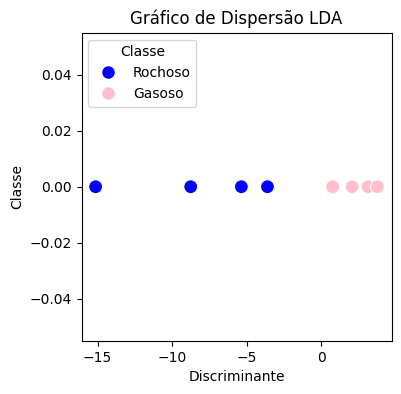

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um dataset fictício com características de planetas
np.random.seed(42)

# Características: Massa (kg), Temperatura média (K), Distância da estrela (AU)
X = np.array([
    [3.30e23, 440, 0.39],  # Mercúrio
    [4.87e24, 737, 0.72],  # Vênus
    [5.97e24, 288, 1.00],  # Terra
    [6.42e23, 210, 1.52],  # Marte
    [1.90e27, 165, 5.20],  # Júpiter
    [5.68e26, 134, 9.58],  # Saturno
    [8.68e25, 76, 19.18],  # Urano
    [1.02e26, 72, 30.07],  # Netuno
])

# Labels: 0 = Rochoso, 1 = Gasoso
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializando o modelo LDA
lda = LDA()

# Treinando o modelo
lda.fit(X_train, y_train)

# Previsões
y_pred = lda.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão do modelo LDA: {accuracy * 100:.2f}%")

# Gráfico de Dispersão após a redução de dimensionalidade com LDA (1D)
X_lda = lda.transform(X)  # Aplicando a transformação LDA

# Criando o gráfico de dispersão
plt.figure(figsize=(4, 4))

# Usando o Seaborn para plotar, com cores definidas
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette={0: 'blue', 1: 'pink'}, s=100)

# Ajustando a legenda manualmente
plt.title("Gráfico de Dispersão LDA")
plt.xlabel("Discriminante")
plt.ylabel("Classe")
from matplotlib.lines import Line2D
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Rochoso'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Gasoso')]
plt.legend(handles=legend_labels, title="Classe", loc='upper left')
plt.show()

QDA - Análise Discriminante Quadrática

Classificação de Tipos de Planetas: Pode ser útil para casos onde as classes têm variâncias diferentes, o que pode ser o caso quando comparamos planetas rochosos e gasosos.

Objetivo: Encontrar uma combinação quadrática das variáveis para separar as classes.

c:\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Precisão do modelo QDA: 33.33%


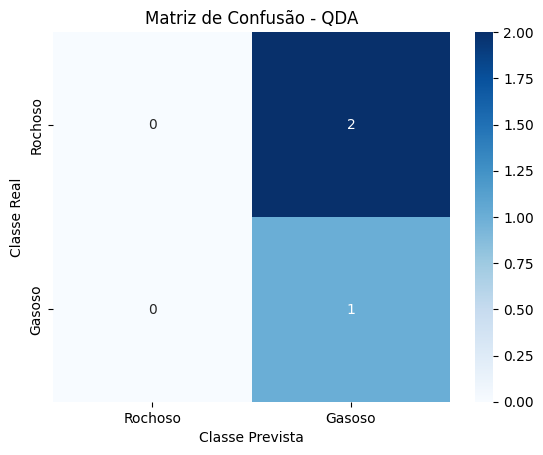

In [33]:
# Importando as bibliotecas necessárias
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Inicializando o modelo QDA
qda = QDA()

# Treinando o modelo
qda.fit(X_train, y_train)

# Previsões
y_pred_qda = qda.predict(X_test)

# Avaliação do modelo
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Precisão do modelo QDA: {accuracy_qda * 100:.2f}%")

# Matriz de confusão
cm_qda = confusion_matrix(y_test, y_pred_qda)
sns.heatmap(cm_qda, annot=True, fmt='d', cmap='Blues', xticklabels=["Rochoso", "Gasoso"], yticklabels=["Rochoso", "Gasoso"])
plt.title("Matriz de Confusão - QDA")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

LDA funciona bem quando as classes têm distribuições gaussianas semelhantes, com variâncias iguais. Ele gera uma fronteira de decisão linear.

QDA é mais flexível, pois permite que as classes tenham variâncias diferentes, resultando em uma fronteira de decisão não linear.

Ambos os métodos podem ser usados para prever o tipo de planeta com base em suas características, e podemos comparar a precisão de ambos os modelos. Se as classes tiverem características semelhantes (sem grandes variações nas variâncias), o LDA pode ser mais eficiente, mas se houver variações consideráveis, o QDA pode ser a melhor escolha.